In [7]:
import numpy as np
import pandas as pd
import sympy as sp  

salary = pd.read_excel("./salary.xlsx")
n = salary["salary"].count()
y = salary["salary"]
x = salary["years"]
g = salary["gender"]

a, b, c = sp.symbols("a b c")
E3 = (1/n)*sum( ((y[i] - (a + b * x[i] + c * g[i]))**2) for i in range(n))
display(sp.simplify(E3))
display(sp.diff(E3, a))
display(sp.diff(E3, b))
display(sp.diff(E3, c))

a = 60
b = 2.9
c = 6
alpha = 0.001 
epsilon = 0.001  
max_iters = 1000 

# Partial derivatives and function
func = lambda a,b,c: 1.0*a**2 + 20.5142857142857*a*b + 0.971428571428571*a*c - 165.931428571429*a + 136.085714285714*b**2 +10.1142857142857*b*c - 1835.8*b + 0.485714285714286*c**2 - 84.1657142857143*c + 7057.30742857143
partialf_a = lambda a,b,c: 2.0*a + 20.5142857142857*b +0.971428571428572*c - 165.931428571429
partialf_b = lambda a,b,c: 20.5142857142857*a + 272.171428571428*b + 10.1142857142857*c - 1835.8
partialf_c = lambda a,b,c: 0.971428571428572*a + 10.1142857142857*b + 0.971428571428572*c - 84.1657142857143

              
for n in range(max_iters):
    a_n = a - alpha * partialf_a(a, b, c)
    b_n = b - alpha * partialf_b(a, b, c)
    c_n = c - alpha * partialf_c(a, b, c)

    print("Iteration", n+1, ": a = ", a_n, ", b = ", b_n, ", c = ", c_n, ", E(a,b,c) = ", func(a_n, b_n, c_n))
    diff = abs(func(a_n, b_n, c_n)-func(a, b, c))
    a = a_n
    b = b_n
    c = c_n

    if diff < epsilon:
        print("The minimum occurs at iteration {} a={}, b={}, c={}, E(a,b,c)={}".format(n+1, a, b, c, func(a,b,c)))
        break
    if n+1 == max_iters:
        print("Did not converge after {} iterations".format(max_iters))

1.0*a**2 + 20.5142857142857*a*b + 0.971428571428571*a*c - 165.931428571429*a + 136.085714285714*b**2 + 10.1142857142857*b*c - 1835.8*b + 0.485714285714286*c**2 - 84.1657142857143*c + 7057.30742857143

2.0*a + 20.5142857142857*b + 0.971428571428572*c - 165.931428571429

20.5142857142857*a + 272.171428571428*b + 10.1142857142857*c - 1835.8

0.971428571428572*a + 10.1142857142857*b + 0.971428571428572*c - 84.1657142857143

Iteration 1 : a =  59.98061142857143 , b =  2.6549600000000027 , c =  5.99072 , E(a,b,c) =  77.54820221921273
Iteration 2 : a =  59.966297469714284 , b =  2.4771044901224535 , c =  5.9839462540408155 , E(a,b,c) =  50.034321479254686
Iteration 3 : a =  59.955667297730706 , b =  2.3480183206912617 , c =  5.9789918747233575 , E(a,b,c) =  35.53595917415896
Iteration 4 : a =  59.94771130947819 , b =  2.254333898796187 , c =  5.975358249083696 , E(a,b,c) =  27.895911628495924
Iteration 5 : a =  59.94169663200768 , b =  2.186347662787234 , c =  5.972683432936126 , E(a,b,c) =  23.869741159376645
Iteration 6 : a =  59.93709127135506 , b =  2.137015778422891 , c =  5.970704690226561 , E(a,b,c) =  21.747844441278176
Iteration 7 : a =  59.933509052001625 , b =  2.1012251127534762 , c =  5.969231300276404 , E(a,b,c) =  20.62937398780923
Iteration 8 : a =  59.93066964832144 , b =  2.0752640326470604 , c =  5.968124818508056 , E(a,b,c) =  20.039642962553444
Iteration 9 : a =  59.92836957133137 , b = 

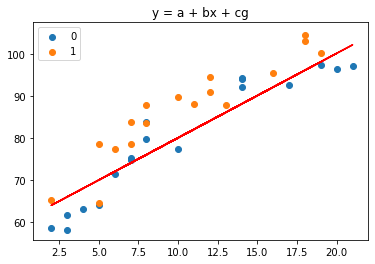

In [37]:
import matplotlib.pyplot as plt

for gender in np.unique(g):
    ix = np.where(gender == g)
    plt.scatter(np.array(x)[ix], np.array(y)[ix], label = gender)
y_pred = a + b * x
plt.plot(x, y_pred, 'r')
plt.title('y = a + bx + cg')
plt.legend()
plt.show()